<a href="https://colab.research.google.com/github/ARC-iTransportation/demo/blob/main/openLab2023_bak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fukushima Traffic Congestion Analytics
# 福島の交通渋滞分析

In this experiment, we will group the road network of Fukushima prefecture based on the congestion observed on each road.　Read the text and press the Play button to run the script.

この実験では、私たちは交通渋滞のパターンをいくつかに分類することが目的となっています。コードの説明読み、適宜実行をお願いします。

### Step 0: Download the Fukushima Traffic Congestion Data

### 福島交通データのダウンロード

In [ ]:
!wget -nc https://www.dropbox.com/scl/fi/5n15mqvqkfpzhm0qqivk0/congestionLengthForHour.csv?rlkey=urv5zjhl2b7wwmcdvl2ygvlpn&dl=0
!mv congestionLengthForHour.csv?rlkey=urv5zjhl2b7wwmcdvl2ygvlpn congestionLengthForHour.csv

--2023-08-11 04:47:53--  https://www.dropbox.com/scl/fi/5n15mqvqkfpzhm0qqivk0/congestionLengthForHour.csv?rlkey=urv5zjhl2b7wwmcdvl2ygvlpn
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/e/scl/fi/5n15mqvqkfpzhm0qqivk0/congestionLengthForHour.csv?rlkey=urv5zjhl2b7wwmcdvl2ygvlpn [following]
--2023-08-11 04:47:53--  https://www.dropbox.com/e/scl/fi/5n15mqvqkfpzhm0qqivk0/congestionLengthForHour.csv?rlkey=urv5zjhl2b7wwmcdvl2ygvlpn
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc84ee357640c01c696da2d5d8ff.dl.dropboxusercontent.com/cd/0/get/CBn-pCrs_YTVe-d2Tli8mp8PGVUV1fIm9QkvT7ONQV3MKsLmqikA_G0zR3kbsKxNHtQkNIciKiJMtuU3NWLfVfD_KziQWB1Rllicop1oKLuoL8xAsVytEmNIHiVXVMSff42MMyoUx4gIZqWRrDXvvmZL/file# [following]
--2023-08-11

### Step 1: Reading the traffic data
### ステップ１：　福島県の道路交通情報の読み込み

In [ ]:
import pandas as pd

input_file = 'congestionLengthForHour.csv'
dataset = pd.read_csv(input_file, index_col=0)
dataset

,"LINESTRING (37.1419776291926 140.21860458527718, 37.14058911797101 140.22638175385237)","LINESTRING (37.383898458756505 140.36024801518934, 37.37778837003653 140.3716361986066)","LINESTRING (37.03395345061722 140.8910515746116, 37.02645445237269 140.89632924043983)","LINESTRING (37.05728416761125 140.89216152887963, 37.05395144287313 140.90021654470286)","LINESTRING (37.797187186952506 140.45688721610486, 37.79718812151231 140.48938439662564)","LINESTRING (37.41361802551454 140.3863555074141, 37.40500782787108 140.38385611807186)","LINESTRING (37.38639820454284 140.36135891586255, 37.383898458756505 140.36024801518934)","LINESTRING (37.74385991475775 140.45466767158848, 37.73969364668409 140.45189032858835)","LINESTRING (37.59471044375256 140.4577298819844, 37.59943224417432 140.46189596945186)","LINESTRING (37.49831756863525 139.92861354311296, 37.50303930381861 139.93055760322358)",...,"LINESTRING (37.78607616334088 140.4155024367164, 37.7910757164911 140.41994626246105)","LINESTRING (36.95285158595973 140.89272177965933, 36.9578510033484 140.892166045194)","LINESTRING (37.45166829490816 140.35357882123407, 37.44305809792446 140.35107943245572)","LINESTRING (37.45166829490816 140.35357882123407, 37.43250347338947 140.3413585353871)","LINESTRING (37.45166829490816 140.35357882123407, 37.43444777440486 140.3441359836782)","LINESTRING (37.43750306732121 140.34719113477584, 37.42750389527853 140.3360814433997)","LINESTRING (37.45166829490816 140.35357882123407, 37.42750389527853 140.3360814433997)","LINESTRING (37.82385141285831 140.47855075790426, 37.85579317001619 140.51271296592634)","LINESTRING (37.69219892271721 140.44578195496985, 37.711918905788046 140.44661430003194)","LINESTRING (37.85607091586698 140.51271295292284, 37.83829471716113 140.49660407160349)"
2019-04-01 00:00:00,0.0,0.0,0.0,0.0,1000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-04-01 01:00:00,0.0,0.0,0.0,0.0,1013.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-04-01 02:00:00,0.0,0.0,0.0,0.0,1200.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-04-01 03:00:00,0.0,0.0,0.0,0.0,1046.0,0.0,0.0,0.0,482.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-04-01 04:00:00,0.0,0.0,0.0,0.0,975.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-31 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-31 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-31 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-31 22:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Step 2: Remove abnormal sensor recordings within in the traffic data
### ステップ２：道路交通情報から無意味なデータ（異常なセンサー記録）を取り除く

#### Step 2.1: Removing the timestamp column


In [ ]:
processed_df = dataset.reset_index()
processed_df = processed_df.drop('index', axis=1)
processed_df

,"LINESTRING (37.1419776291926 140.21860458527718, 37.14058911797101 140.22638175385237)","LINESTRING (37.383898458756505 140.36024801518934, 37.37778837003653 140.3716361986066)","LINESTRING (37.03395345061722 140.8910515746116, 37.02645445237269 140.89632924043983)","LINESTRING (37.05728416761125 140.89216152887963, 37.05395144287313 140.90021654470286)","LINESTRING (37.797187186952506 140.45688721610486, 37.79718812151231 140.48938439662564)","LINESTRING (37.41361802551454 140.3863555074141, 37.40500782787108 140.38385611807186)","LINESTRING (37.38639820454284 140.36135891586255, 37.383898458756505 140.36024801518934)","LINESTRING (37.74385991475775 140.45466767158848, 37.73969364668409 140.45189032858835)","LINESTRING (37.59471044375256 140.4577298819844, 37.59943224417432 140.46189596945186)","LINESTRING (37.49831756863525 139.92861354311296, 37.50303930381861 139.93055760322358)",...,"LINESTRING (37.78607616334088 140.4155024367164, 37.7910757164911 140.41994626246105)","LINESTRING (36.95285158595973 140.89272177965933, 36.9578510033484 140.892166045194)","LINESTRING (37.45166829490816 140.35357882123407, 37.44305809792446 140.35107943245572)","LINESTRING (37.45166829490816 140.35357882123407, 37.43250347338947 140.3413585353871)","LINESTRING (37.45166829490816 140.35357882123407, 37.43444777440486 140.3441359836782)","LINESTRING (37.43750306732121 140.34719113477584, 37.42750389527853 140.3360814433997)","LINESTRING (37.45166829490816 140.35357882123407, 37.42750389527853 140.3360814433997)","LINESTRING (37.82385141285831 140.47855075790426, 37.85579317001619 140.51271296592634)","LINESTRING (37.69219892271721 140.44578195496985, 37.711918905788046 140.44661430003194)","LINESTRING (37.85607091586698 140.51271295292284, 37.83829471716113 140.49660407160349)"
0,0.0,0.0,0.0,0.0,1000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1013.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1200.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1046.0,0.0,0.0,0.0,482.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,975.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Step 2.1: Removing abonormal high values (congestion lengths greater than 2 kilometers)
異常値の削除


Sometimes sensors record abnormal high and low values due to erosion. It is important to remove them from the data.

時折、センサーは異常な高値や低値を記録することがあります。これらをデータから取り除く。

In [ ]:
maxValueInEachColumn = dataset.max() #Gathering the maximum PM2.5 value recorded by each sensor
maxValueInEachColumn

LINESTRING (37.1419776291926 140.21860458527718, 37.14058911797101 140.22638175385237)       720.0
LINESTRING (37.383898458756505 140.36024801518934, 37.37778837003653 140.3716361986066)      991.0
LINESTRING (37.03395345061722 140.8910515746116, 37.02645445237269 140.89632924043983)      1030.0
LINESTRING (37.05728416761125 140.89216152887963, 37.05395144287313 140.90021654470286)      883.0
LINESTRING (37.797187186952506 140.45688721610486, 37.79718812151231 140.48938439662564)    1330.0
                                                                                             ...  
LINESTRING (37.43750306732121 140.34719113477584, 37.42750389527853 140.3360814433997)       980.0
LINESTRING (37.45166829490816 140.35357882123407, 37.42750389527853 140.3360814433997)      1980.0
LINESTRING (37.82385141285831 140.47855075790426, 37.85579317001619 140.51271296592634)      990.0
LINESTRING (37.69219892271721 140.44578195496985, 37.711918905788046 140.44661430003194)    1770.0
LINESTRING

<AxesSubplot:>

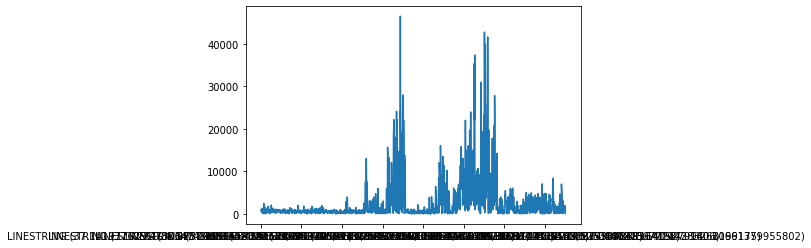

In [ ]:
maxValueInEachColumn.plot()

<AxesSubplot:>

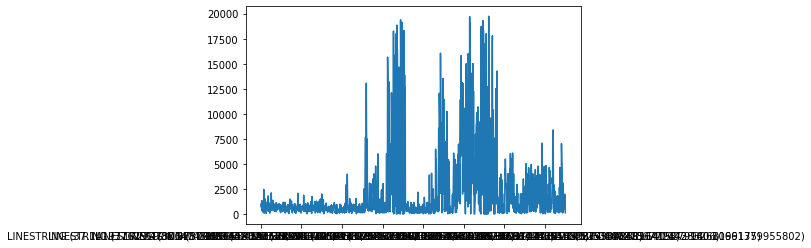

In [ ]:
dataset.where(dataset <= 20000, 0, inplace=True)
dataset.max().plot()

#### Step 2.3: Removing abnormal low values recorded by the sensors
低すぎる値の削除

<AxesSubplot:>

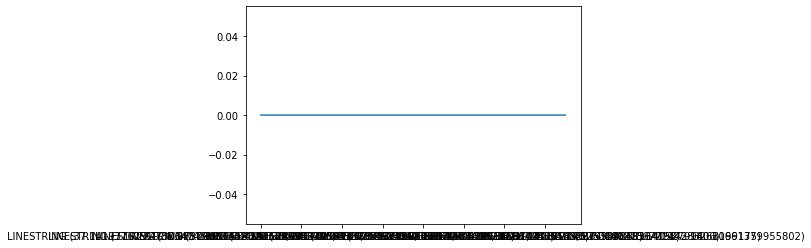

In [ ]:
minValueInEachColumn = dataset.min() #Reading the minimum PM2.5 value recorded by each sensor
minValueInEachColumn.plot()

Since no sensor has recorded values less than 0. It is fine.

### Step 3: Visualizing the Fukushima Traffic Congestion Data

#### Step 3.1: Viewing the maximum traffic congestion length observed on each road using a heatmap (Redder/hotter the data, longer the traffic. Colder, shorter)
### ステップ 3: 各道路の最大渋滞長を可視化 (赤いほど渋滞が長い、青いほど渋滞が短い)。

In [ ]:
import shapely.geometry
import shapely.wkt
# max_congestion = pd.DataFrame(columns=["long", "lat", "maxLength"])
lat_list = list()
lon_list = list()
maxLength_list = list()
for line, length in dataset.max().items():
    line = shapely.wkt.loads(line)
    x, y = line.xy
    lat_list.append(x[0])
    lon_list.append(y[0])
    maxLength_list.append(length)
max_congestion = pd.DataFrame({'long': lon_list, 'lat': lat_list, 'maxLength': maxLength_list})
#max_congestion

import plotly.express as px
from statistics import median

fig = px.density_mapbox(max_congestion, lat = 'lat', lon = 'long', z = 'maxLength',
                        radius = 6,
                        zoom = 6,
                        height=500,
                        width=1000,
                        center=dict(lat=median(lat_list), lon=median(lon_list)),
                        mapbox_style = 'open-street-map',)
fig.show()

,long,lat,maxLength
0,140.218605,37.141978,720.0
1,140.360248,37.383898,991.0
2,140.891052,37.033953,1030.0
3,140.892162,37.057284,883.0
4,140.456887,37.797187,1330.0
...,...,...,...
1498,140.347191,37.437503,980.0
1499,140.353579,37.451668,1980.0
1500,140.478551,37.823851,990.0
1501,140.445782,37.692199,1770.0


#### Step 3.2: Viewing the roads that have frequently observed traffic congestion

#### ステップ 4: 渋滞が頻繁に発生する道路を見つける

In [ ]:
lat_list = list()
lon_list = list()
count_list = list()

for line, count in (dataset > 0).sum().items():
    line = shapely.wkt.loads(line)
    x, y = line.xy
    lat_list.append(x[0])
    lon_list.append(y[0])
    count_list.append(count)
count_congestion = pd.DataFrame({'long': lon_list, 'lat': lat_list, 'count': count_list})
#count_congestion

fig = px.density_mapbox(count_congestion, lat = 'lat', lon = 'long', z = 'count',
                        radius = 6,
                        zoom = 6,
                        height=500,
                        width=1000,
                        center=dict(lat=median(lat_list), lon=median(lon_list)),
                        mapbox_style = 'open-street-map')
fig.show()

,long,lat,count
0,140.218605,37.141978,476
1,140.360248,37.383898,2670
2,140.891052,37.033953,1609
3,140.892162,37.057284,349
4,140.456887,37.797187,1096
...,...,...,...
1498,140.347191,37.437503,1
1499,140.353579,37.451668,1
1500,140.478551,37.823851,3
1501,140.445782,37.692199,5


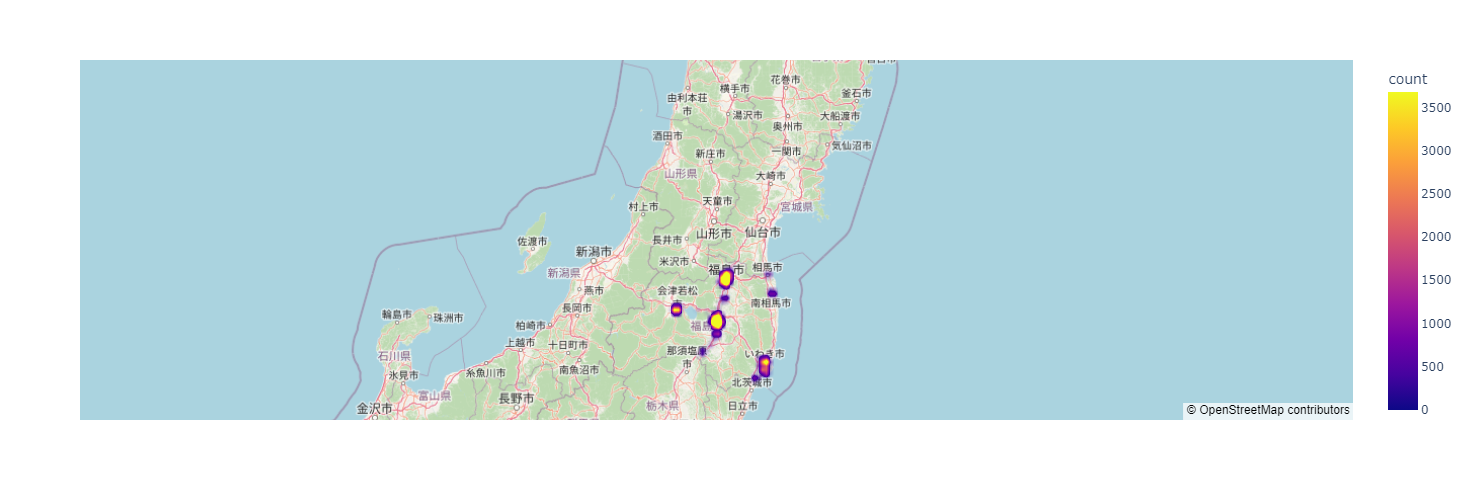

### Step 4: Grouping the road network of Fukushima prefecture using k-Means algorithm

#### Step 4.1: Finding the good _k_-number to group the road network

In [ ]:
dataset['time'] = pd.to_datetime(dataset.index)
avg_df = dataset.groupby([dataset['time'].dt.month, dataset['time'].dt.hour]).mean().T.iloc[:-1, :]
avg_df

time                                                 1                        
time                                                 0    1    2    3    4    
LINESTRING (37.1419776291926 140.21860458527718...  0.0  0.0  0.0  0.0  0.0  \
LINESTRING (37.383898458756505 140.360248015189...  0.0  0.0  0.0  0.0  0.0   
LINESTRING (37.03395345061722 140.8910515746116...  0.0  0.0  0.0  0.0  0.0   
LINESTRING (37.05728416761125 140.8921615288796...  0.0  0.0  0.0  0.0  0.0   
LINESTRING (37.797187186952506 140.456887216104...  0.0  0.0  0.0  0.0  0.0   
...                                                 ...  ...  ...  ...  ...   
LINESTRING (37.43750306732121 140.3471911347758...  0.0  0.0  0.0  0.0  0.0   
LINESTRING (37.45166829490816 140.3535788212340...  0.0  0.0  0.0  0.0  0.0   
LINESTRING (37.82385141285831 140.4785507579042...  0.0  0.0  0.0  0.0  0.0   
LINESTRING (37.69219892271721 140.4457819549698...  0.0  0.0  0.0  0.0  0.0   
LINESTRING (37.85607091586698 140.5127129529228...  0.0  0.0  0.0  0.0  0.0   

time                                                                          
time                                                 5    6    7    8    9    
LINESTRING (37.1419776291926 140.21860458527718...  0.0  0.0  0.0  0.0  0.0  \
LINESTRING (37.383898458756505 140.360248015189...  0.0  0.0  0.0  0.0  0.0   
LINESTRING (37.03395345061722 140.8910515746116...  0.0  0.0  0.0  0.0  0.0   
LINESTRING (37.05728416761125 140.8921615288796...  0.0  0.0  0.0  0.0  0.0   
LINESTRING (37.797187186952506 140.456887216104...  0.0  0.0  0.0  0.0  0.0   
...                                                 ...  ...  ...  ...  ...   
LINESTRING (37.43750306732121 140.3471911347758...  0.0  0.0  0.0  0.0  0.0   
LINESTRING (37.45166829490816 140.3535788212340...  0.0  0.0  0.0  0.0  0.0   
LINESTRING (37.82385141285831 140.4785507579042...  0.0  0.0  0.0  0.0  0.0   
LINESTRING (37.69219892271721 140.4457819549698...  0.0  0.0  0.0  0.0  0.0   
LINESTRING (37.85607091586698 140.5127129529228...  0.0  0.0  0.0  0.0  0.0   

time                                                ...          12   
time                                                ...          14   
LINESTRING (37.1419776291926 140.21860458527718...  ...  141.935484  \
LINESTRING (37.383898458756505 140.360248015189...  ...  213.096774   
LINESTRING (37.03395345061722 140.8910515746116...  ...   67.774194   
LINESTRING (37.05728416761125 140.8921615288796...  ...  109.451613   
LINESTRING (37.797187186952506 140.456887216104...  ...         0.0   
...                                                 ...         ...   
LINESTRING (37.43750306732121 140.3471911347758...  ...         0.0   
LINESTRING (37.45166829490816 140.3535788212340...  ...         0.0   
LINESTRING (37.82385141285831 140.4785507579042...  ...         0.0   
LINESTRING (37.69219892271721 140.4457819549698...  ...         0.0   
LINESTRING (37.85607091586698 140.5127129529228...  ...         0.0   

time                                                                         
time                                                        15          16   
LINESTRING (37.1419776291926 140.21860458527718...  151.387097  116.709677  \
LINESTRING (37.383898458756505 140.360248015189...  257.451613  222.870968   
LINESTRING (37.03395345061722 140.8910515746116...  114.354839  112.903226   
LINESTRING (37.05728416761125 140.8921615288796...   122.16129  125.580645   
LINESTRING (37.797187186952506 140.456887216104...         0.0         0.0   
...                                                        ...         ...   
LINESTRING (37.43750306732121 140.3471911347758...         0.0         0.0   
LINESTRING (37.45166829490816 140.3535788212340...         0.0         0.0   
LINESTRING (37.82385141285831 140.4785507579042...         0.0         0.0   
LINESTRING (37.69219892271721 140.4457819549698...         0.0         0.0   
LINESTRING (37.85607091586698 140.5127129529228...         0.0         0.0   

time 

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_sc = sc.fit_transform(avg_df)
df_sc = pd.DataFrame(df_sc, columns=avg_df.columns)

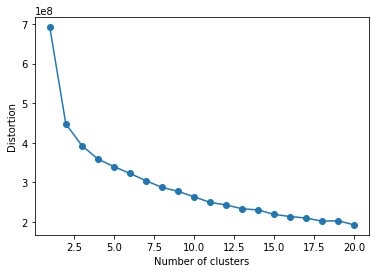

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
distortions = []
for i  in range(1,21):                # 1~10クラスタまで一気に計算
    km = KMeans(n_clusters=i,
                init='k-means++',     # k-means++法によりクラスタ中心を選択
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(avg_df)                         # クラスタリングの計算を実行
    distortions.append(km.inertia_)   # km.fitするとkm.inertia_が得られる

plt.plot(range(1,21),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

#### Step 4.2: Clustering the road network with number of groups= 10

In [ ]:
model = KMeans(n_clusters=11,
                init='k-means++',     # k-means++法によりクラスタ中心を選択
                n_init=10,
                max_iter=300,
                random_state=0)
y_km = model.fit_predict(avg_df)

In [ ]:
avg_df['cluster'] = y_km
avg_df.groupby('cluster').count()

time       1                                                         ...   
time       0     1     2     3     4     5     6     7     8     9   ...   
cluster                                                              ...   
0        1247  1247  1247  1247  1247  1247  1247  1247  1247  1247  ...  \
1          41    41    41    41    41    41    41    41    41    41  ...   
2          24    24    24    24    24    24    24    24    24    24  ...   
3          18    18    18    18    18    18    18    18    18    18  ...   
4          30    30    30    30    30    30    30    30    30    30  ...   
5           1     1     1     1     1     1     1     1     1     1  ...   
6           1     1     1     1     1     1     1     1     1     1  ...   
7           1     1     1     1     1     1     1     1     1     1  ...   
8           2     2     2     2     2     2     2     2     2     2  ...   
9           1     1     1     1     1     1     1     1     1     1  ...   
10        137   137   137   137   137   137   137   137   137   137  ...   

time       12                                                        
time       14    15    16    17    18    19    20    21    22    23  
cluster                                                              
0        1247  1247  1247  1247  1247  1247  1247  1247  1247  1247  
1          41    41    41    41    41    41    41    41    41    41  
2          24    24    24    24    24    24    24    24    24    24  
3          18    18    18    18    18    18    18    18    18    18  
4          30    30    30    30    30    30    30    30    30    30  
5           1     1     1     1     1     1     1     1     1     1  
6           1     1     1     1     1     1     1     1     1     1  
7           1     1     1     1     1     1     1     1     1     1  
8           2     2     2     2     2     2     2     2     2     2  
9           1     1     1     1     1     1     1     1     1     1  
10        137   137   137   137   137   137   137   137   137   137  

[11 rows x 288 columns]

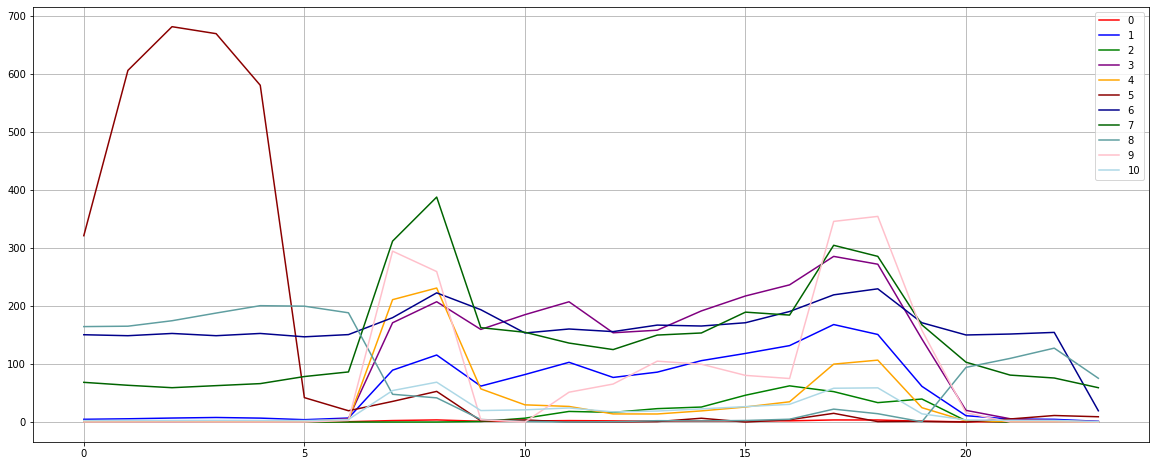

In [ ]:


colors = ['red', 'blue', 'green', 'purple', 'orange',
          'darkred', 'darkblue', 'darkgreen', 'cadetblue',
          'pink', 'lightblue', 'lightgreen', 'gray', 'black',
          'lightgray', 'lightred', 'darkpurple', 'white', 'beige']
color_dict = {cluster: colors[cluster] for cluster in range(11)}
fig, ax = plt.subplots(figsize=(20, 8)) # xticks=range(0, 24, 2), grid=True
for cluster, result in avg_df.groupby('cluster').mean().T.groupby(level=1).mean().T.iterrows():
    ax.plot(list(range(24)), result, color=colors[cluster], label=cluster)
ax.legend()
ax.grid(True)

In [ ]:
import folium
import shapely
from shapely import wkt
import shapely.geometry
# import geopandas as gpd
colors = ['red', 'blue', 'green', 'purple', 'orange',
          'darkred', 'darkblue', 'darkgreen', 'cadetblue',
          'pink', 'lightblue', 'lightgreen', 'gray', 'black',
          'lightgray', 'lightred', 'darkpurple','white', 'beige']
m = folium.Map(location=[37.5, 140.4], zoom_start=10)

for linestring, row in avg_df.iterrows():
    linestring = shapely.wkt.loads(linestring)
    x, y = linestring.xy
    # print(colors[row['cluster'].values[0]])
    line = folium.vector_layers.PolyLine(locations=[(x[0], y[0]),
                                         (x[1], y[1])], color=colors[row['cluster'].values[0]], weight=2)
    m.add_child(line)

m